In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from scipy.optimize import minimize,rosen, rosen_der
import statsmodels.api as sm

# Loading content of Paris_Weather

In [3]:
paris=pd.read_excel('Paris_weather1.xls')
paris.columns

Index(['Date', 'high Temp.�(�C)', 'avg Temp.�(�C)', 'low Temp.�(�C)',
       'high Dew Point�(�C)', 'avg Dew Point�(�C)', 'low Dew Point�(�C)',
       'high Humidity�(%)', 'avg Humidity�(%)', 'low Humidity�(%)',
       'high Sea Level Press.�(hPa)', 'avg Sea Level Press.�(hPa)',
       'low Sea Level Press.�(hPa)', 'high Visibility�(km)',
       'avg Visibility�(km)', 'low Visibility�(km)', 'high Wind�(km/h)',
       'avg Wind�(km/h)', 'high Gust Wind�(km/h)', 'sum Precip.�(mm)',
       'Events'],
      dtype='object')

In [4]:
new_columnz={'Date':'Date', 'high Temp.�(�C)':'high Temp', 'avg Temp.�(�C)':'avg Temp', 'low Temp.�(�C)'
             :'low Temp','high Dew Point�(�C)':'high Dew Point',
             'avg Dew Point�(�C)':'av Dew Point',
             'low Dew Point�(�C)':'low Dew Point',
             'high Humidity�(%)':' high Humidity', 'avg Humidity�(%)':'avg Humidity', 'low Humidity�(%)':'low Humidity',
             'high Sea Level Press.�(hPa)':'High sea level', 'avg Sea Level Press.�(hPa)':'avg Sea Level Press',
             'low Sea Level Press.�(hPa)':'low Sea Level Press', 'high Visibility�(km)':'high Visibility',
             'avg Wind�(km/h)':'avg Wind', 'high Gust Wind�(km/h)':'high Gust Wind', 'sum Precip.�(mm)':'sum Precip',
             'Events':'Events'
            }
paris=paris.rename(columns=new_columnz)

In [5]:
paris.columns

Index(['Date', 'high Temp', 'avg Temp', 'low Temp', 'high Dew Point',
       'av Dew Point', 'low Dew Point', ' high Humidity', 'avg Humidity',
       'low Humidity', 'High sea level', 'avg Sea Level Press',
       'low Sea Level Press', 'high Visibility', 'avg Visibility�(km)',
       'low Visibility�(km)', 'high Wind�(km/h)', 'avg Wind', 'high Gust Wind',
       'sum Precip', 'Events'],
      dtype='object')

# Question 1

In [6]:
Paris_weather=paris.interpolate(method='linear')

Paris_weather.drop(columns=['high Gust Wind','Events'],inplace=True)
Paris_weather.Date=pd.to_datetime(Paris_weather['Date'])

Paris_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    datetime64[ns]
 1   high Temp            365 non-null    int64         
 2   avg Temp             365 non-null    int64         
 3   low Temp             365 non-null    int64         
 4   high Dew Point       365 non-null    int64         
 5   av Dew Point         365 non-null    int64         
 6   low Dew Point        365 non-null    int64         
 7    high Humidity       365 non-null    int64         
 8   avg Humidity         365 non-null    int64         
 9   low Humidity         365 non-null    int64         
 10  High sea level       365 non-null    int64         
 11  avg Sea Level Press  365 non-null    int64         
 12  low Sea Level Press  365 non-null    int64         
 13  high Visibility      365 non-null  

# Question 2

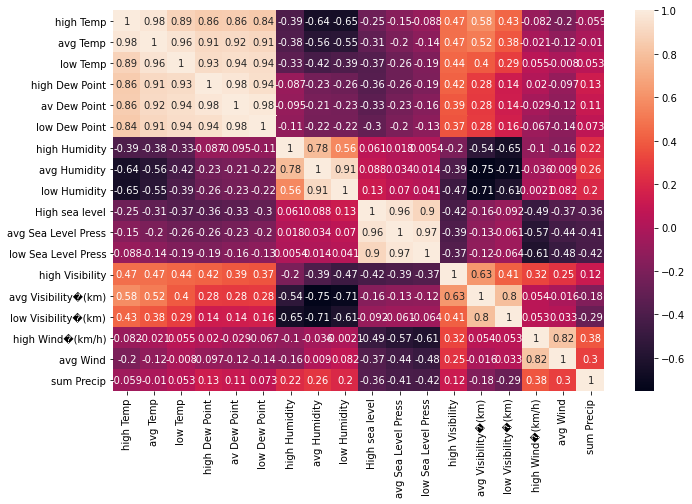

In [7]:
plt.figure(figsize=(11,7))

sns.heatmap(Paris_weather.corr(),annot=True)
plt.show()

In [8]:
Paris_weather.head()

,Date,high Temp,avg Temp,low Temp,high Dew Point,av Dew Point,low Dew Point,high Humidity,avg Humidity,low Humidity,High sea level,avg Sea Level Press,low Sea Level Press,high Visibility,avg Visibility�(km),low Visibility�(km),high Wind�(km/h),avg Wind,sum Precip
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0


# Question 3

In [9]:
Historique=pd.read_excel('Historique.xls',skiprows=17)
Historique.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Date', 'Type de données',
       'Energie journalière (MWh)'],
      dtype='object')

In [10]:
Historiqu=Historique.loc[1:]
Historiqu

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Date,Type de données,Energie journalière (MWh)
1,NaN,NaN,NaN,01/01/2017,Définitives,1652084.0
2,NaN,NaN,NaN,02/01/2017,Définitives,1768332.0
3,NaN,NaN,NaN,03/01/2017,Définitives,1886120.0
4,NaN,NaN,NaN,04/01/2017,Définitives,1923775.0
5,NaN,NaN,NaN,05/01/2017,Définitives,1887470.0
...,...,...,...,...,...,...
372,NaN,NaN,NaN,27/12/2017,Définitives,1582970.0
373,NaN,NaN,NaN,28/12/2017,Définitives,1664743.0
374,NaN,NaN,NaN,29/12/2017,Définitives,1668623.0
375,NaN,NaN,NaN,30/12/2017,Définitives,1437082.0


In [11]:
History={'Date':Historiqu['Date'],'Energy':Historiqu['Energie journalière (MWh)']}


Historica=pd.DataFrame(data=History)
Historica.to_csv('EnergyConsumption.csv')

In [12]:
Energy_Consumption=pd.read_csv('EnergyConsumption.csv')
Energy_Consumption.head()

,Unnamed: 0,Date,Energy
0,1,01/01/2017,1652084.0
1,2,02/01/2017,1768332.0
2,3,03/01/2017,1886120.0
3,4,04/01/2017,1923775.0
4,5,05/01/2017,1887470.0


In [13]:
Energy_Consumption.Date=pd.to_datetime(Energy_Consumption['Date'],dayfirst=True)
Energy_Consumption.drop(columns=['Unnamed: 0'],inplace=True)
Energy_Consumption.dropna(inplace=True)
Energy_Consumption=Energy_Consumption.reset_index(drop=True)

In [14]:
Energy_Consumption.head()

,Date,Energy
0,2017-01-01,1652084.0
1,2017-01-02,1768332.0
2,2017-01-03,1886120.0
3,2017-01-04,1923775.0
4,2017-01-05,1887470.0


In [15]:
Paris_weather.Date=pd.to_datetime(Paris_weather.Date,dayfirst=True)
Paris_weather.head()

,Date,high Temp,avg Temp,low Temp,high Dew Point,av Dew Point,low Dew Point,high Humidity,avg Humidity,low Humidity,High sea level,avg Sea Level Press,low Sea Level Press,high Visibility,avg Visibility�(km),low Visibility�(km),high Wind�(km/h),avg Wind,sum Precip
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0


In [16]:
dataset=Energy_Consumption.merge(Paris_weather,how='inner',on='Date')
dataset.head()


,Date,Energy,high Temp,avg Temp,low Temp,high Dew Point,av Dew Point,low Dew Point,high Humidity,avg Humidity,low Humidity,High sea level,avg Sea Level Press,low Sea Level Press,high Visibility,avg Visibility�(km),low Visibility�(km),high Wind�(km/h),avg Wind,sum Precip
0,2017-01-01,1652084.0,0,-3,-5,-1,-3,-6,100,94,86,1030,1023,1020,7.0,3.0,0.0,10,6,0
1,2017-01-02,1768332.0,2,0,-2,1,1,-1,100,95,88,1030,1025,1022,14.0,4.0,0.0,16,6,2
2,2017-01-03,1886120.0,1,0,-1,1,0,-1,100,95,88,1032,1030,1028,7.0,2.0,0.0,14,6,0
3,2017-01-04,1923775.0,6,2,-1,4,1,-1,100,87,71,1028,1025,1023,19.0,9.0,3.0,23,14,2
4,2017-01-05,1887470.0,7,3,1,2,0,-2,93,79,59,1038,1032,1027,19.0,12.0,10.0,14,11,0


In [17]:
dataset.columns

Index(['Date', 'Energy', 'high Temp', 'avg Temp', 'low Temp', 'high Dew Point',
       'av Dew Point', 'low Dew Point', ' high Humidity', 'avg Humidity',
       'low Humidity', 'High sea level', 'avg Sea Level Press',
       'low Sea Level Press', 'high Visibility', 'avg Visibility�(km)',
       'low Visibility�(km)', 'high Wind�(km/h)', 'avg Wind', 'sum Precip'],
      dtype='object')

# Question 4

Text(0.5, 1.0, 'Energy consumption vs Temperature')

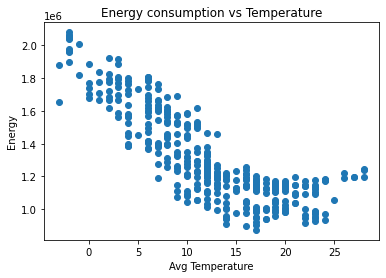

In [18]:

plt.scatter(dataset['avg Temp'],dataset.Energy)

plt.xlabel('Avg Temperature')
plt.ylabel('Energy')
plt.title('Energy consumption vs Temperature')

# Question 5

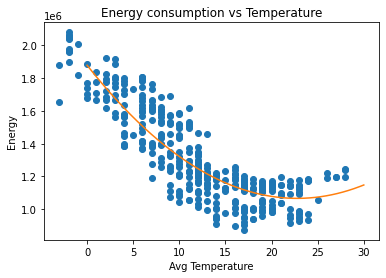

In [19]:
p=np.poly1d(np.polyfit(dataset['avg Temp'],dataset.Energy,2))

xp=np.linspace(0,30,200)
plt.plot(dataset['avg Temp'],dataset.Energy,'o',xp,p(xp),'-')
plt.xlabel('Avg Temperature')
plt.ylabel('Energy')
plt.title('Energy consumption vs Temperature')
plt.show()

# Question 6

In [20]:
min_y=np.min(p(xp))
min_y

1065866.3040307984

In [88]:
p

poly1d([ 1.56746388e+03, -7.14068953e+04,  1.87911356e+06])

In [152]:
a,b,c=p
min_x=-b/(2*a)
#Differentiating and equating to zero to get global minimun.
#a*x**2+b*x+c so C became Zero
#D_y=a*min_x**2+b*min_x+c
#Plug All min_x into x for getting the value of Y
D_y=a*min_x**2+b*min_x+c

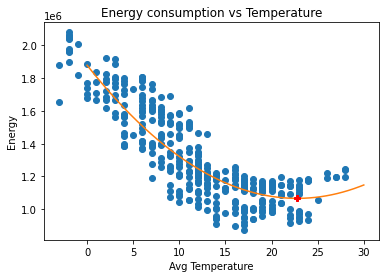

In [156]:
p=np.poly1d(np.polyfit(dataset['avg Temp'],dataset.Energy,2))

xp=np.linspace(0,30,200)
plt.plot(dataset['avg Temp'],dataset.Energy,'o',xp,p(xp),'-',min_x,D_y,'Pr')
plt.xlabel('Avg Temperature')
plt.ylabel('Energy')
plt.title('Energy consumption vs Temperature')
plt.show()

In [154]:
dataset.columns

Index(['Date', 'Energy', 'high Temp', 'avg Temp', 'low Temp', 'high Dew Point',
       'av Dew Point', 'low Dew Point', ' high Humidity', 'avg Humidity',
       'low Humidity', 'High sea level', 'avg Sea Level Press',
       'low Sea Level Press', 'high Visibility', 'avg Visibility�(km)',
       'low Visibility�(km)', 'high Wind�(km/h)', 'avg Wind', 'sum Precip',
       'Day_Week'],
      dtype='object')

# Question 7

In [125]:
y=dataset.Energy

In [126]:
x=dataset[['high Temp', 'avg Temp', 'low Temp','high Dew Point', 'av Dew Point', 'low Dew Point',' high Humidity', 'avg Humidity', 'low Humidity','High sea level', 'avg Sea Level Press','low Sea Level Press', 'high Visibility','avg Visibility�(km)','low Visibility�(km)', 'high Wind�(km/h)','avg Wind', 'sum Precip']]

In [127]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [128]:
forward_regression(x,y,0.05,verbose=False)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitl

['high Temp',
 'high Visibility',
 ' high Humidity',
 'avg Temp',
 'low Humidity',
 'av Dew Point',
 'low Sea Level Press']

In [129]:
#X=sm.add_constant(x)
X=sm.add_constant(x[['high Temp','high Visibility',' high Humidity','avg Temp','low Humidity','av Dew Point','low Sea Level Press']])
Y=y
model=sm.OLS(Y,X)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     153.5
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          1.38e-103
Time:                        20:56:32   Log-Likelihood:                -4840.2
No. Observations:                 365   AIC:                             9696.
Df Residuals:                     357   BIC:                             9728.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.048e+06   9.23e+05      4.386      0.000    2.23e+06    5.86e+06
high Temp            3585.7551   5904.975      0.607      0.544   -8027.152    1.52e+04
high Visibility     -5717.8214   1528.928     -3.740      0.000   -8724.659   -2710.984
 high Humidity      -3118.4070   1604.879     -1.943      0.053   -6274.612      37.798
avg Temp            -5070.8868   1.09e+04     -0.465      0.642   -2.65e+04    1.64e+04
low Humidity         7036.7101   1292.365      5.445      0.000    4495.105    9578.315
av Dew Point        -3.051e+04   9571.729     -3.187      0.002   -4.93e+04   -1.17e+04
low Sea Level Press -2365.3149    874.851     -2.704      0.007   -4085.825    -644.805
==============================================================================
Omnibus:                        1.134   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.567   Jarque-Bera (JB):                1.122
Skew:                           0.012   Prob(JB):                        0.571
Kurtosis:                       2.729   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
results.rsquared

0.7506437341112865

# Question 8

In [131]:
fx={}
for item in x.columns:
    fx.update({item+'^2':x[item]**2})

In [132]:
fx1=pd.DataFrame(data=fx)
fx1.head()

,high Temp^2,avg Temp^2,low Temp^2,high Dew Point^2,av Dew Point^2,low Dew Point^2,high Humidity^2,avg Humidity^2,low Humidity^2,High sea level^2,avg Sea Level Press^2,low Sea Level Press^2,high Visibility^2,avg Visibility�(km)^2,low Visibility�(km)^2,high Wind�(km/h)^2,avg Wind^2,sum Precip^2
0,0,9,25,1,9,36,10000,8836,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,4,0,4,1,1,1,10000,9025,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,1,0,1,1,0,1,10000,9025,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,36,4,1,16,1,1,10000,7569,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,49,9,1,4,0,4,8649,6241,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0


In [133]:
Q=pd.concat([x,fx1],axis=1)

In [134]:
listItem=[]
for item in Q.columns:
    listItem.append(item)

In [135]:
Q.columns

Index(['high Temp', 'avg Temp', 'low Temp', 'high Dew Point', 'av Dew Point',
       'low Dew Point', ' high Humidity', 'avg Humidity', 'low Humidity',
       'High sea level', 'avg Sea Level Press', 'low Sea Level Press',
       'high Visibility', 'avg Visibility�(km)', 'low Visibility�(km)',
       'high Wind�(km/h)', 'avg Wind', 'sum Precip', 'high Temp^2',
       'avg Temp^2', 'low Temp^2', 'high Dew Point^2', 'av Dew Point^2',
       'low Dew Point^2', ' high Humidity^2', 'avg Humidity^2',
       'low Humidity^2', 'High sea level^2', 'avg Sea Level Press^2',
       'low Sea Level Press^2', 'high Visibility^2', 'avg Visibility�(km)^2',
       'low Visibility�(km)^2', 'high Wind�(km/h)^2', 'avg Wind^2',
       'sum Precip^2'],
      dtype='object')

In [136]:
x2=Q[['high Temp', 'avg Temp', 'low Temp', 'high Dew Point', 'av Dew Point','low Dew Point', ' high Humidity', 'avg Humidity', 'low Humidity',
     'High sea level', 'avg Sea Level Press', 'low Sea Level Press','high Visibility', 'avg Visibility�(km)', 'low Visibility�(km)',
     'high Wind�(km/h)', 'avg Wind', 'sum Precip', 'high Temp^2','avg Temp^2', 'low Temp^2', 'high Dew Point^2', 'av Dew Point^2',
     'low Dew Point^2', ' high Humidity^2', 'avg Humidity^2',
     'low Sea Level Press^2', 'high Visibility^2', 'avg Visibility�(km)^2','low Visibility�(km)^2', 'high Wind�(km/h)^2', 'avg Wind^2',
     'sum Precip^2']]

In [137]:
forward_regression(x2,y,0.05,verbose=False)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitl

['high Temp', 'high Temp^2', 'high Visibility^2', 'high Visibility']

In [138]:
X=sm.add_constant(x2[['high Temp', 'high Temp^2', 'high Visibility^2', 'high Visibility']])
Y=y
model=sm.OLS(Y,X)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     375.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          4.32e-127
Time:                        20:57:17   Log-Likelihood:                -4793.6
No. Observations:                 365   AIC:                             9597.
Df Residuals:                     360   BIC:                             9617.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.876e+06   6.85e+04     27.367      0.000    1.74e+06    2.01e+06
high Temp           -7.1e+04   3478.925    -20.409      0.000   -7.78e+04   -6.42e+04
high Temp^2        1265.1194     94.316     13.414      0.000    1079.641    1450.598
high Visibility^2  -554.7229    155.190     -3.574      0.000    -859.915    -249.531
high Visibility    2.277e+04   7031.741      3.238      0.001    8939.141    3.66e+04
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.298
Skew:                          -0.194   Prob(JB):                        0.317
Kurtosis:                       3.034   Cond. No.                     9.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
results.rsquared

0.8068265031072407

# Question 9

In [140]:
#dataset['Day_week']=pd.get_dummies(list['Mone'])

In [141]:
dataset['Day_Week']=dataset.Date.dt.day_name()
dataset.head()

,Date,Energy,high Temp,avg Temp,low Temp,high Dew Point,av Dew Point,low Dew Point,high Humidity,avg Humidity,...,High sea level,avg Sea Level Press,low Sea Level Press,high Visibility,avg Visibility�(km),low Visibility�(km),high Wind�(km/h),avg Wind,sum Precip,Day_Week
0,2017-01-01,1652084.0,0,-3,-5,-1,-3,-6,100,94,...,1030,1023,1020,7.0,3.0,0.0,10,6,0,Sunday
1,2017-01-02,1768332.0,2,0,-2,1,1,-1,100,95,...,1030,1025,1022,14.0,4.0,0.0,16,6,2,Monday
2,2017-01-03,1886120.0,1,0,-1,1,0,-1,100,95,...,1032,1030,1028,7.0,2.0,0.0,14,6,0,Tuesday
3,2017-01-04,1923775.0,6,2,-1,4,1,-1,100,87,...,1028,1025,1023,19.0,9.0,3.0,23,14,2,Wednesday
4,2017-01-05,1887470.0,7,3,1,2,0,-2,93,79,...,1038,1032,1027,19.0,12.0,10.0,14,11,0,Thursday


In [142]:
# Get one hot encoding of columns B one_hot = pd.get_dummies(df['B']) # Drop column B as it is now encoded df = df.drop('B',axis = 1) # Join the encoded df df = df.join(one_hot) df 

In [143]:
one_hot=pd.get_dummies(dataset['Day_Week'])
one_hot

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
360,0,0,0,0,0,0,1
361,0,0,0,0,1,0,0
362,1,0,0,0,0,0,0
363,0,0,1,0,0,0,0


In [144]:
Hot_data=pd.concat([one_hot,Q],axis=1)
Hot_data

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,high Temp,avg Temp,low Temp,...,low Humidity^2,High sea level^2,avg Sea Level Press^2,low Sea Level Press^2,high Visibility^2,avg Visibility�(km)^2,low Visibility�(km)^2,high Wind�(km/h)^2,avg Wind^2,sum Precip^2
0,0,0,0,1,0,0,0,0,-3,-5,...,7396,1060900,1046529,1040400,49.0,9.0,0.0,100,36,0
1,0,1,0,0,0,0,0,2,0,-2,...,7744,1060900,1050625,1044484,196.0,16.0,0.0,256,36,4
2,0,0,0,0,0,1,0,1,0,-1,...,7744,1065024,1060900,1056784,49.0,4.0,0.0,196,36,0
3,0,0,0,0,0,0,1,6,2,-1,...,5041,1056784,1050625,1046529,361.0,81.0,9.0,529,196,4
4,0,0,0,0,1,0,0,7,3,1,...,3481,1077444,1065024,1054729,361.0,144.0,100.0,196,121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,0,1,6,4,3,...,3600,996004,974169,964324,961.0,144.0,36.0,1521,576,16
361,0,0,0,0,1,0,0,6,2,-1,...,3249,1022121,1010025,998001,961.0,256.0,100.0,361,169,0
362,1,0,0,0,0,0,0,8,3,-1,...,2916,1024144,1012036,1000000,961.0,144.0,9.0,1024,169,144
363,0,0,1,0,0,0,0,14,10,6,...,5329,1022121,1012036,1000000,361.0,81.0,9.0,1024,361,9


In [145]:
Hot_data.columns

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'high Temp', 'avg Temp', 'low Temp', 'high Dew Point',
       'av Dew Point', 'low Dew Point', ' high Humidity', 'avg Humidity',
       'low Humidity', 'High sea level', 'avg Sea Level Press',
       'low Sea Level Press', 'high Visibility', 'avg Visibility�(km)',
       'low Visibility�(km)', 'high Wind�(km/h)', 'avg Wind', 'sum Precip',
       'high Temp^2', 'avg Temp^2', 'low Temp^2', 'high Dew Point^2',
       'av Dew Point^2', 'low Dew Point^2', ' high Humidity^2',
       'avg Humidity^2', 'low Humidity^2', 'High sea level^2',
       'avg Sea Level Press^2', 'low Sea Level Press^2', 'high Visibility^2',
       'avg Visibility�(km)^2', 'low Visibility�(km)^2', 'high Wind�(km/h)^2',
       'avg Wind^2', 'sum Precip^2'],
      dtype='object')

In [146]:
'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday'

('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday')

In [147]:
x3=Hot_data[['high Temp', 'avg Temp', 'low Temp', 'high Dew Point', 'av Dew Point','low Dew Point', ' high Humidity', 'avg Humidity', 'low Humidity',
     'High sea level', 'avg Sea Level Press', 'low Sea Level Press','high Visibility', 'avg Visibility�(km)', 'low Visibility�(km)',
     'high Wind�(km/h)', 'avg Wind', 'sum Precip', 'high Temp^2','avg Temp^2', 'low Temp^2', 'high Dew Point^2', 'av Dew Point^2',
     'low Dew Point^2', ' high Humidity^2', 'avg Humidity^2',
     'low Sea Level Press^2', 'high Visibility^2', 'avg Visibility�(km)^2','low Visibility�(km)^2', 'high Wind�(km/h)^2', 'avg Wind^2',
     'sum Precip^2','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday']]

In [148]:
forward_regression(x3,dataset.Energy,0.05,verbose=False)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitl

['high Temp',
 'high Temp^2',
 'Sunday',
 'Saturday',
 'avg Temp',
 'low Humidity',
 'high Wind�(km/h)^2',
 'Monday',
 'sum Precip',
 'avg Temp^2',
 'high Dew Point^2']

In [149]:
x_list=['high Temp','high Temp^2','Sunday','Saturday','avg Temp','low Humidity','high Wind�(km/h)^2','Monday','sum Precip','avg Temp^2','high Dew Point^2']



In [150]:
X=sm.add_constant(Hot_data[x_list])
Y=y
model=sm.OLS(Y,X)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     272.1
Date:                Fri, 12 Feb 2021   Prob (F-statistic):          6.38e-165
Time:                        20:57:43   Log-Likelihood:                -4683.2
No. Observations:                 365   AIC:                             9390.
Df Residuals:                     353   BIC:                             9437.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.733e+06   5.38e+04     32.245      0.000    1.63e+06    1.84e+06
high Temp          -1.691e+04   9001.864     -1.878      0.061   -3.46e+04     796.760
high Temp^2          536.5955    227.949      2.354      0.019      88.286     984.905
Sunday             -1.992e+05   1.43e+04    -13.962      0.000   -2.27e+05   -1.71e+05
Saturday           -1.538e+05   1.43e+04    -10.728      0.000   -1.82e+05   -1.26e+05
avg Temp           -5.053e+04   8705.470     -5.805      0.000   -6.77e+04   -3.34e+04
low Humidity        3600.0343    531.897      6.768      0.000    2553.949    4646.120
high Wind�(km/h)^2    69.1519     15.379      4.497      0.000      38.907      99.397
Monday             -4.022e+04   1.44e+04     -2.790      0.006   -6.86e+04   -1.19e+04
sum Precip         -4348.2329   2071.836     -2.099      0.037   -8422.927    -273.539
avg Temp^2          1027.6963    331.779      3.098      0.002     375.183    1680.209
high Dew Point^2    -342.6131    142.597     -2.403      0.017    -623.060     -62.166
==============================================================================
Omnibus:                       12.088   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.831
Skew:                          -0.179   Prob(JB):                     3.00e-05
Kurtosis:                       4.114   Cond. No.                     8.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
results.rsquared

0.8945057843312311